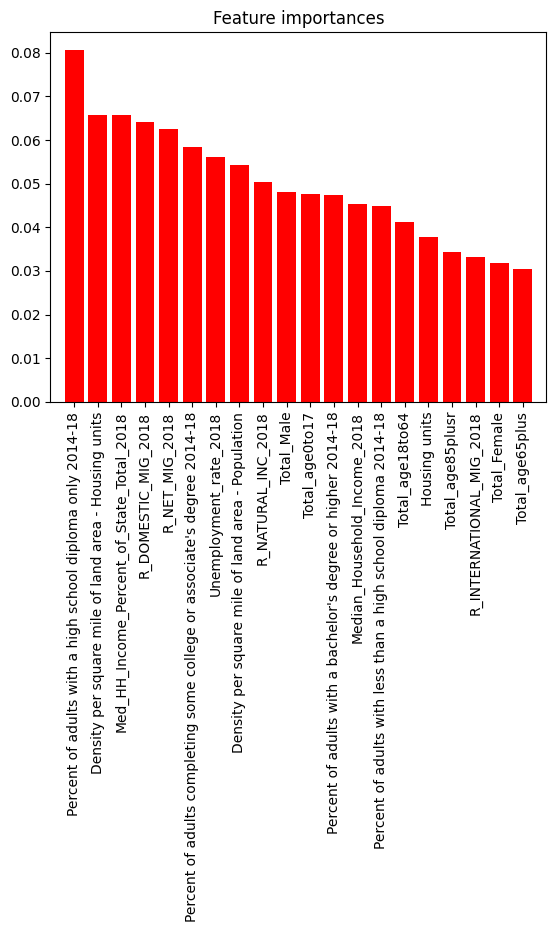

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.83      0.83      0.83         6

    accuracy                           0.86        14
   macro avg       0.85      0.85      0.85        14
weighted avg       0.86      0.86      0.86        14

Accuracy: 0.8571428571428571


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


file_path = 'Re-adjusted demographic data for florida counties.csv'
data = pd.read_csv(file_path)


features = [
    'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018',
    'Percent of adults with less than a high school diploma 2014-18',
    'Percent of adults with a high school diploma only 2014-18',
    'Percent of adults completing some college or associate\'s degree 2014-18',
    'Percent of adults with a bachelor\'s degree or higher 2014-18',
    'Unemployment_rate_2018', 'Median_Household_Income_2018',
    'Med_HH_Income_Percent_of_State_Total_2018', 'Housing units',
    'Density per square mile of land area - Population',
    'Density per square mile of land area - Housing units', 'Total_Male',
    'Total_Female', 'Total_age0to17', 'Total_age18to64', 'Total_age65plus', 'Total_age85plusr'
]
target = 'Hotspot'


data[features] = data[features].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=features + [target])


X = data[features]
y = data[target].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train_scaled, y_train)
importances = forest.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


top_features = [features[i] for i in indices[:10]]


X_train_top = X_train[top_features]
X_test_top = X_test[top_features]
X_train_top_scaled = scaler.fit_transform(X_train_top)
X_test_top_scaled = scaler.transform(X_test_top)

model_top = LogisticRegression()
model_top.fit(X_train_top_scaled, y_train)
y_pred_top = model_top.predict(X_test_top_scaled)


print(classification_report(y_test, y_pred_top))
print(f"Accuracy: {accuracy_score(y_test, y_pred_top)}")
